In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import prettytable as pt
import statistics as st
import math

In [2]:
def import_data(filename):
    return np.genfromtxt(filename, delimiter=',', dtype=int)

data = import_data('lab1.csv')


In [3]:
print(*data[0:10])

60 66 52 54 63 55 58 62 61 64


In [4]:
def variation_range(input_array):

    input_array.sort()
    simple_var_range = dict()
    for number in input_array:
        if simple_var_range.get(number, 0) != 0:
            simple_var_range[number] += 1
        else:
            simple_var_range[number] = 1
    freq_var_range = simple_var_range.copy()

    num_count = len(input_array)
    for number in freq_var_range.keys():
        freq_var_range[number] = np.round(freq_var_range[number] / num_count, 4)

    return list(simple_var_range.keys()),\
           list(simple_var_range.values()),\
           list(freq_var_range.values())

x, n, f = variation_range(data)
table = pt.PrettyTable()
table.add_column('Варіанта',x)
table.add_column('Частота',n)
table.add_column('Відносна частота',f)
print(table)

+----------+---------+------------------+
| Варіанта | Частота | Відносна частота |
+----------+---------+------------------+
|    43    |    1    |      0.0033      |
|    45    |    1    |      0.0033      |
|    46    |    1    |      0.0033      |
|    47    |    1    |      0.0033      |
|    48    |    7    |      0.0232      |
|    50    |    9    |      0.0298      |
|    51    |    3    |      0.0099      |
|    52    |    13   |      0.043       |
|    53    |    5    |      0.0166      |
|    54    |    10   |      0.0331      |
|    55    |    16   |      0.053       |
|    56    |    20   |      0.0662      |
|    57    |    15   |      0.0497      |
|    58    |    18   |      0.0596      |
|    59    |    16   |      0.053       |
|    60    |    23   |      0.0762      |
|    61    |    24   |      0.0795      |
|    62    |    20   |      0.0662      |
|    63    |    13   |      0.043       |
|    64    |    12   |      0.0397      |
|    65    |    8    |      0.0265

In [5]:
def interval_variation_range(input_array, intervals_count, print_table=False):
    min_num = np.min(input_array)
    max_num = np.max(input_array)
    interval_length = (max_num - min_num) / intervals_count
    n = math.ceil((max_num - min_num) / interval_length)
    x, bins = np.histogram(input_array, bins=n)
    range_column = []
    number_column = x
    for i in range(1, len(bins)):
        range_column.append(f'{np.round(bins[i-1],2)}-{np.round(bins[i],2)}')
    table = pt.PrettyTable()
    table.add_column('Інтервали', range_column)
    table.add_column('К-сть входжень', number_column)
    if print_table:
        print(table)
    return x, bins

In [6]:
x, bins = interval_variation_range(data, 9, print_table=True)

+-------------+----------------+
|  Інтервали  | К-сть входжень |
+-------------+----------------+
|  43.0-46.78 |       3        |
| 46.78-50.56 |       17       |
| 50.56-54.33 |       31       |
| 54.33-58.11 |       69       |
| 58.11-61.89 |       63       |
| 61.89-65.67 |       53       |
| 65.67-69.44 |       51       |
| 69.44-73.22 |       11       |
|  73.22-77.0 |       4        |
+-------------+----------------+


In [7]:
def numerical_characteristic(input_data):
    mode = st.mode(input_data)
    median = st.median(input_data)
    mean = st.mean(input_data)
    scope = np.max(input_data) - np.min(input_data)
    Q1 = np.percentile(input_data, 25, interpolation='midpoint')
    Q2 = np.percentile(input_data, 50, interpolation='midpoint')
    Q3 = np.percentile(input_data, 75, interpolation='midpoint')
    Q_scope = Q3 - Q1
    variance = st.variance(input_data)
    std = st.stdev(input_data)
    return mode, median, mean, scope, Q1, Q2, Q3, Q_scope, variance, std

mode, median, mean, scope, Q1, Q2, Q3, Q_scope, variance, std = numerical_characteristic(data)

print(f'Мода - {mode}')
print(f'Медіана - {median}')
print(f'Середнє - {mean}')
print(f'Розмах - {scope}')
print(f'Перший квартиль - {Q1}')
print(f'Другий квартиль - {Q2}')
print(f'Третій квартиль - {Q3}')
print(f'Міжквартильний розмах - {Q_scope}')
print(f'Дисперсія - {variance}')
print(f'СКВ - {std}')

Мода - 61
Медіана - 60.0
Середнє - 60
Розмах - 34
Перший квартиль - 56.0
Другий квартиль - 60.0
Третій квартиль - 64.0
Міжквартильний розмах - 8.0
Дисперсія - 36
СКВ - 6.0


In [8]:
def histogram(input_array, intervals_count, draw_histogram=True):
    x, bins = interval_variation_range(input_array, intervals_count)
    fig, ax = plt.subplots()
    x, bins, y = plt.hist(input_array, bins=bins, edgecolor='black')
    ax.set_xticks(bins)
    ax.set_title('Гістограма частот')
    ax.set_xlabel('Інтервали')
    ax.set_ylabel('Кількість входженнь варіанти')
    
    
    if draw_histogram:
        plt.show()

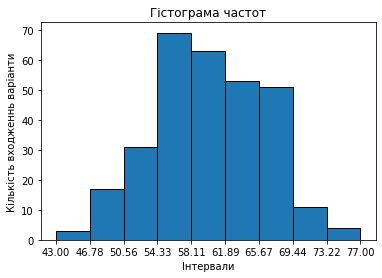

In [9]:
histogram(data,9)

In [10]:
def ECD_function(input_data,intervals_count):

    x, bins = interval_variation_range(input_data, intervals_count)
    x = x / len(input_data)

    ax = plt.subplots()[1]
    ax.set_xticks(bins)
    ax.set_xlabel('Інтервали')
    plt.title('Імперична функція розподілу для інтервального ряду')
    y = x.cumsum()
    for i in range(len(y)):
        plt.plot([bins[i], bins[i+1]],[y[i], y[i]], c="black") 
    plt.show()

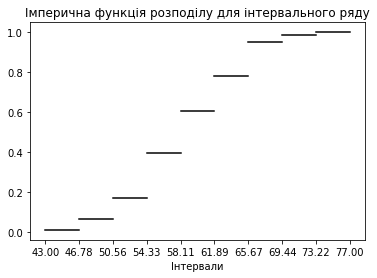

In [11]:
ECD_function(data,9)

In [12]:
data_frame = pd.read_csv('data.csv', delimiter=';')

In [13]:
data_frame.describe()


,Conflicts intencity,GDP per capita,Population
count,136.000000,1.360000e+02,1.360000e+02
mean,1.977941,3.725446e+07,5.362308e+11
std,1.532207,1.272781e+08,1.941314e+12
min,0.000000,7.043900e+04,9.645992e+08
25%,0.000000,3.502713e+06,1.382807e+10
50%,3.000000,8.345330e+06,5.240744e+10
75%,3.000000,2.329577e+07,2.989508e+11
max,5.000000,1.150780e+09,1.856910e+13


In [14]:
data_frame.head(5)

,Country,ISO,Conflicts intencity,Hospital beds,High-technology exports,GDP per capita,Population
0,Albania,ALB,0,2.6,15123662,3266790,1.192689e+10
1,Algeria,DZA,3,,2449466,26554329,1.560800e+11
2,Angola,AGO,3,,,12553446,8.963316e+10
3,Argentina,ARG,1,4.7,1442450760,33193918,5.458660e+11
4,Armenia,ARM,3,3.9,16565073,3505251,1.054733e+10


In [15]:
data_frame.tail(6)

,Country,ISO,Conflicts intencity,Hospital beds,High-technology exports,GDP per capita,Population
130,United States,USA,3,2.9,1.53526E+11,252981000,1.856910e+13
131,Uruguay,URY,0,2.5,266119238,3132050,5.241972e+10
132,Venezuela. Bolivarian Republic of,VEN,3,0.9,18092984,20332079,3.710060e+11
133,Viet Nam,VNM,3,,38735943417,67242400,2.026160e+11
134,Yemen,YEM,5,0.7,2946931,12661614,2.731761e+10
135,Zambia,ZMB,0,,36503179,8239732,1.955109e+10


In [16]:
data_frame = data_frame.drop(['ISO'],axis=1)

In [17]:
data_frame

,Country,Conflicts intencity,Hospital beds,High-technology exports,GDP per capita,Population
0,Albania,0,2.6,15123662,3266790,1.192689e+10
1,Algeria,3,,2449466,26554329,1.560800e+11
2,Angola,3,,,12553446,8.963316e+10
3,Argentina,1,4.7,1442450760,33193918,5.458660e+11
4,Armenia,3,3.9,16565073,3505251,1.054733e+10
...,...,...,...,...,...,...
131,Uruguay,0,2.5,266119238,3132050,5.241972e+10
132,Venezuela. Bolivarian Republic of,3,0.9,18092984,20332079,3.710060e+11
133,Viet Nam,3,,38735943417,67242400,2.026160e+11
134,Yemen,5,0.7,2946931,12661614,2.731761e+10


In [18]:
gdp_per_capita = np.array(data_frame['GDP per capita'].tolist())
population = np.array(data_frame['Population'].tolist())
data_frame['GDP'] = data_frame['GDP per capita'] * data_frame['Population']
data_frame

,Country,Conflicts intencity,Hospital beds,High-technology exports,GDP per capita,Population,GDP
0,Albania,0,2.6,15123662,3266790,1.192689e+10,3.896265e+16
1,Algeria,3,,2449466,26554329,1.560800e+11,4.144600e+18
2,Angola,3,,,12553446,8.963316e+10,1.125205e+18
3,Argentina,1,4.7,1442450760,33193918,5.458660e+11,1.811943e+19
4,Armenia,3,3.9,16565073,3505251,1.054733e+10,3.697104e+16
...,...,...,...,...,...,...,...
131,Uruguay,0,2.5,266119238,3132050,5.241972e+10,1.641812e+17
132,Venezuela. Bolivarian Republic of,3,0.9,18092984,20332079,3.710060e+11,7.543323e+18
133,Viet Nam,3,,38735943417,67242400,2.026160e+11,1.362439e+19
134,Yemen,5,0.7,2946931,12661614,2.731761e+10,3.458850e+17


In [19]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)
data_frame = data_frame.fillna(0)
data_frame.replace(' ',0)

,Country,Conflicts intencity,Hospital beds,High-technology exports,GDP per capita,Population,GDP
0,Albania,0,2.6,15123662,3266790,1.192689e+10,3.896265e+16
1,Algeria,3,0,2449466,26554329,1.560800e+11,4.144600e+18
2,Angola,3,0,0,12553446,8.963316e+10,1.125205e+18
3,Argentina,1,4.7,1442450760,33193918,5.458660e+11,1.811943e+19
4,Armenia,3,3.9,16565073,3505251,1.054733e+10,3.697104e+16
...,...,...,...,...,...,...,...
131,Uruguay,0,2.5,266119238,3132050,5.241972e+10,1.641812e+17
132,Venezuela. Bolivarian Republic of,3,0.9,18092984,20332079,3.710060e+11,7.543323e+18
133,Viet Nam,3,0,38735943417,67242400,2.026160e+11,1.362439e+19
134,Yemen,5,0.7,2946931,12661614,2.731761e+10,3.458850e+17


In [20]:
data_frame.describe()

,Conflicts intencity,GDP per capita,Population,GDP
count,136.000000,1.360000e+02,1.360000e+02,1.360000e+02
mean,1.977941,3.725446e+07,5.362308e+11,1.632076e+20
std,1.532207,1.272781e+08,1.941314e+12,1.184000e+21
min,0.000000,7.043900e+04,9.645992e+08,1.005393e+14
25%,0.000000,3.502713e+06,1.382807e+10,5.515877e+16
50%,3.000000,8.345330e+06,5.240744e+10,4.559736e+17
75%,3.000000,2.329577e+07,2.989508e+11,4.711841e+18
max,5.000000,1.150780e+09,1.856910e+13,1.288770e+22


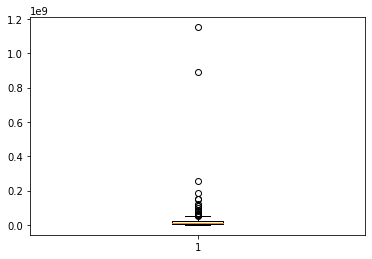

In [21]:
plt.boxplot(data_frame['GDP per capita'])
plt.show()

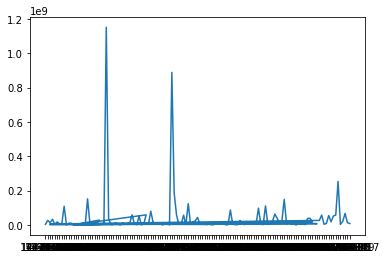

In [22]:
plt.plot(data_frame['High-technology exports'],data_frame['GDP per capita'])
plt.draw()